In [1]:
!pip install catalax

In [1]:
import json
import jax.numpy as jnp
import catalax as ctx
import catalax.neural as ctn
from tqdm import tqdm
import numpy as np
import catalax as ctx
import catalax.mcmc as cmc

# Pretraining 

In [2]:
# Initialize the model
model = ctx.Model(name="PGM ENO")

# Add species
model.add_species("s0")
model.add_species("s1")
model.add_species("s2")

# Add ODEs
model.add_ode("s0", "- (vf_pgm/k_p3ga_pgm)*(s0-s1/keq_pgm)/(1+(s1/k_p2ga_pgm)+(s0/k_p3ga_pgm))")
model.add_ode("s1", 
              """(vf_pgm/k_p3ga_pgm)*(s0-s1/keq_pgm)/(1+(s1/k_p2ga_pgm)+(s0/k_p3ga_pgm))
              - (vf_eno/k_p2ga_eno)*(s1-s2/keq_eno)/(1+(s1/k_p2ga_eno)+(s2/k_PEP_eno))
              """
             )
model.add_ode("s2", "(vf_eno/k_p2ga_eno)*(s1-s2/keq_eno)/(1+(s1/k_p2ga_eno)+(s2/k_PEP_eno))")

# Prepare the model for bayes and define priors 
model.parameters.vf_eno.value = 1.35
model.parameters.vf_pgm.value = 9.4
model.parameters.keq_pgm.value = 0.19
model.parameters.keq_eno.value = 6.7
model.parameters.k_p2ga_pgm.value = 0.08
model.parameters.k_p3ga_pgm.value = 1.2
model.parameters.k_p2ga_eno.value = 0.04
model.parameters.k_PEP_eno.value = 0.5

model

Model summary


Eq(x, Matrix([[s0, s1, s2]]))

Eq(theta, Matrix([[k_p3ga_pgm, k_p2ga_pgm, keq_pgm, vf_pgm, vf_eno, k_PEP_eno, keq_eno, k_p2ga_eno]]))

Eq(Derivative(s0, t), -vf_pgm*(s0 - s1/keq_pgm)/(k_p3ga_pgm*(1 + s0/k_p3ga_pgm + s1/k_p2ga_pgm)))

Eq(Derivative(s1, t), vf_pgm*(s0 - s1/keq_pgm)/(k_p3ga_pgm*(1 + s0/k_p3ga_pgm + s1/k_p2ga_pgm)) - vf_eno*(s1 - s2/keq_eno)/(k_p2ga_eno*(1 + s1/k_p2ga_eno + s2/k_PEP_eno)))

Eq(Derivative(s2, t), vf_eno*(s1 - s2/keq_eno)/(k_p2ga_eno*(1 + s1/k_p2ga_eno + s2/k_PEP_eno)))

name      symbol  value  constant initial_value equation lower_bound  \
0   k_PEP_eno   k_PEP_eno   0.50     False          None     None        None   
1  k_p2ga_eno  k_p2ga_eno   0.04     False          None     None        None   
2  k_p2ga_pgm  k_p2ga_pgm   0.08     False          None     None        None   
3  k_p3ga_pgm  k_p3ga_pgm   1.20     False          None     None        None   
4     keq_eno     keq_eno   6.70     False          None     None        None   
5     keq_pgm     keq_pgm   0.19     False          None     None        None   
6      vf_eno      vf_eno   1.35     False          None     None        None   
7      vf_pgm      vf_pgm   9.40     False          None     None        None   

  upper_bound  
0        None  
1        None  
2        None  
3        None  
4        None  
5        None  
6        None  
7        None

In [ ]:
#See file in .../Training Set 3/Data_Testing_Set_3_20242309.npy
#See file in .../Training Set 3/Time_Testing_Set_3_20242309.npy
#See file in .../Training Set 3/Testing_Set_3_Initials_20242309.npy
#See file in .../Training Set 3/Corrected_model_3_20242309.json

In [3]:
data = jnp.load("C:/Users/danic/Thesis/Data/Testing and Validation Arrays/Testing Set 3/Data_Testing_Set_3_20242309.npy")
time = jnp.load("C:/Users/danic/Thesis/Data/Testing and Validation Arrays/Testing Set 3/Time_Testing_Set_3_20242309.npy")
y0s = jnp.load("C:/Users/danic/Thesis/Data/Testing and Validation Arrays/Testing Set 3/Testing_Set_3_Initials_20242309.npy")
initial_conditions = json.load(open("C:/Users/danic/Thesis/Data/Testing and Validation Arrays/Testing Set 3/Corrected_model_3_20242309.json", "r"))  
print(f"Time: {time.shape} | Data: {data.shape} | Initial Conditions: {y0s.shape}")
print(data.shape)
print(time.shape)
print(y0s.shape)



Time: (30, 15) | Data: (30, 15, 3) | Initial Conditions: (30, 3)
(30, 15, 3)
(30, 15)
(30, 3)


In [ ]:
#See file in ..Data/Testing and Validation Arrays/A and B/Validation_Set_A_and_B_20242309.npy
##See file in ..Data/Testing and Validation Arrays/A and B/Time_Validation_Set_A_and_B_20242309.npy
##See file in ..Data/Testing and Validation Arrays/A and B/Validation_Set_A_and_B_Initials_20242309.npy
##See file in ..Data/Testing and Validation Arrays/A and B/model_Validation_Set_A_and_B_20242309.json


In [4]:
val_data = jnp.load("C:/Users/danic/Thesis/Data/Testing and Validation Arrays/A and B/Validation_Set_A_and_B_20242309.npy")
val_time = jnp.load("C:/Users/danic/Thesis/Data/Testing and Validation Arrays/A and B/Time_Validation_Set_A_and_B_20242309.npy")
val_y0s = jnp.load("C:/Users/danic/Thesis/Data/Testing and Validation Arrays/A and B/Validation_Set_A_and_B_Initials_20242309.npy")
val_initial_conditions = json.load(open("C:/Users/danic/Thesis/Data/Testing and Validation Arrays/A and B/model_Validation_Set_A_and_B_20242309.json", "r"))  

In [11]:
# Visualize the data
f = ctx.visualize(
    model=model,
    data=data,
    times=time,
    initial_conditions=initial_conditions,
    figsize=(8,4),
)

C:\Users\danic\anaconda3\envs\test\Lib\site-packages\IPython\core\events.py:82: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  func(*args, **kwargs)
C:\Users\danic\anaconda3\envs\test\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


In [12]:
f.savefig("C:/Users/danic/Thesis/Data/Pretaining_Set_3_visualization.png", dpi=300, bbox_inches="tight")

C:\Users\danic\AppData\Local\Temp\ipykernel_28660\2362308333.py:1: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  f.savefig("C:/Users/danic/Thesis/Data/Pretaining_Set_visualization.png", dpi=300, bbox_inches="tight")


In [13]:
import pickle
# Save the file to a specific directory
with open("C:/Users/danic/Thesis/Data/Pretaining_Set_3_visualization.pkl", "wb") as file:
    pickle.dump(f, file)


# Training 

In [10]:
# Create a neural ODE model
rbf = ctn.RBFLayer(0.6)
neural_ode = ctn.NeuralODE.from_model(model, width_size=16, depth=1, activation=rbf)

# Set up a training strategy (You can interchange the loss function too!)
strategy = ctn.Strategy()
strategy.add_step(lr=1e-3, length=0.1, steps=1000, batch_size=20, alpha=0.1)
strategy.add_step(lr=1e-3, steps=3000, batch_size=20, alpha=0.01)
strategy.add_step(lr=1e-4, steps=5000, batch_size=20, alpha=0.01)

# Train neural ODE
trained = ctn.train_neural_ode(
    model=neural_ode,
    data=data,
    times=time,
    inital_conditions=y0s,
    strategy=strategy,
    sigma=0.03,
    n_augmentations=10,
    print_every=10,
    weight_scale=1e-3,
    save_milestones=False, # Set to True to save model checkpoints
    # log="progress.log", # Uncomment this line to log progress
)

C:\Users\danic\anaconda3\envs\test\Lib\site-packages\catalax\neural\rbf.py:25: FutureWarning: uniform accepts a single key, but was given a key array of shape (1, 2) != (). Use jax.vmap for batching. In a future JAX version, this will be an error.
  self.mu = jax.random.uniform(mukey, (width_size,))



🚀 Training NeuralODE...

🔸 Step #1
├── lr: 0.001
├── batch size: 20
├── length: 10.0%
├── l2 reg: 0.1
├── train: mlp
│


╰── loss: 0.0700 mae: 0.2089: : 1010it [00:37, 26.96it/s]                                                              




🔸 Step #2
├── lr: 0.001
├── batch size: 20
├── length: 100.0%
├── l2 reg: 0.01
├── train: mlp
│


╰── loss: 0.1275 mae: 0.3702: : 3010it [01:08, 44.22it/s]                                                              




🔸 Step #3
├── lr: 0.0001
├── batch size: 20
├── length: 100.0%
├── l2 reg: 0.01
├── train: mlp
│


╰── loss: 0.1210 mae: 0.3589: : 5010it [01:21, 61.67it/s]                                                              

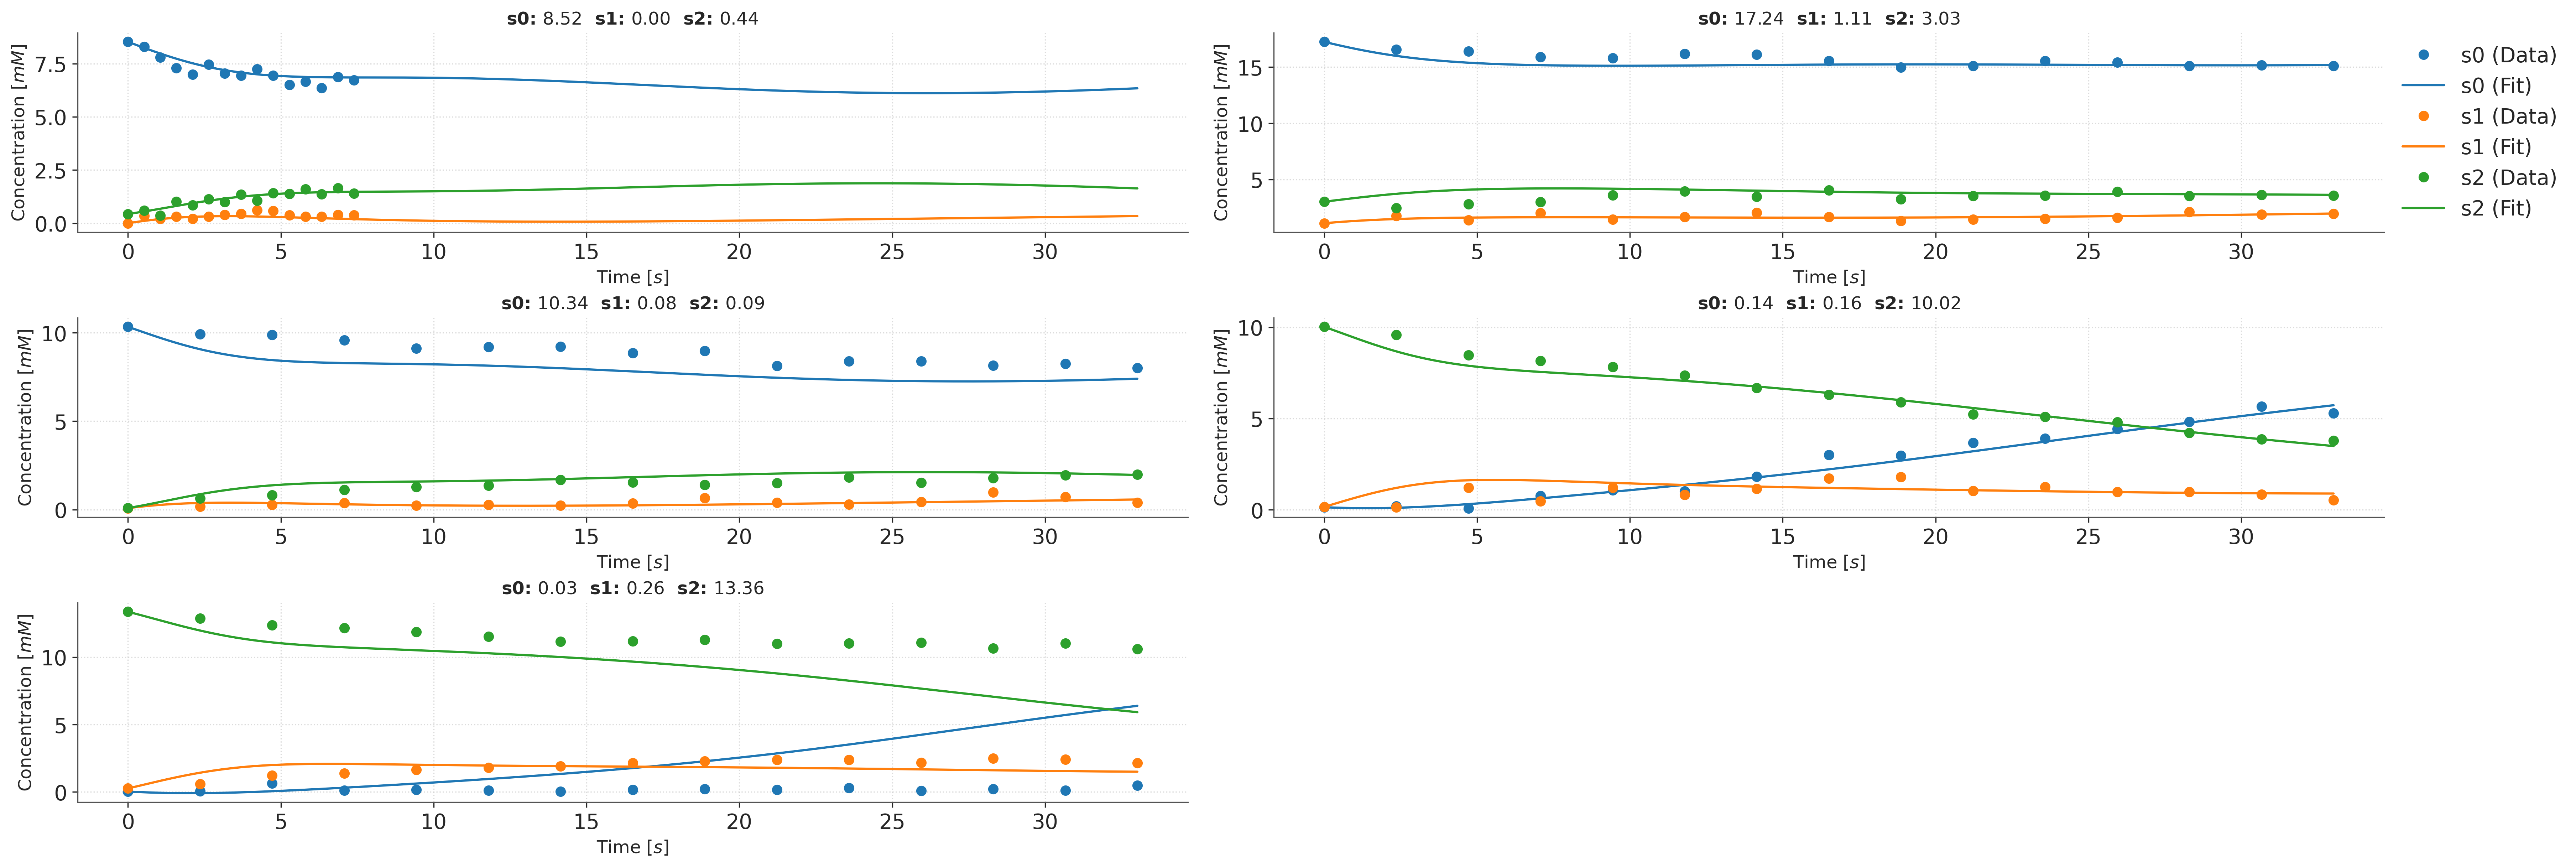

In [14]:
# Save model and visualize fit
trained.save_to_eqx("C:/Users/danic/OneDrive/Desktop/", "Trained Set 3")
f = ctx.visualize(
    model=model,
    data=data[:5],
    times=time[:2],
    neural_ode=trained,
    initial_conditions=initial_conditions[:5],
    figsize=(8,4),
)

# Fit 

In [15]:
result, new_model = ctx.optimize(
    model=model,
    initial_conditions=initial_conditions,
    data=data,
    times=time,
    global_upper_bound=1e5,
    global_lower_bound=1e-6,
    method="bfgs"
)

C:\Users\danic\anaconda3\envs\test\Lib\site-packages\IPython\core\events.py:82: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  func(*args, **kwargs)
C:\Users\danic\anaconda3\envs\test\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


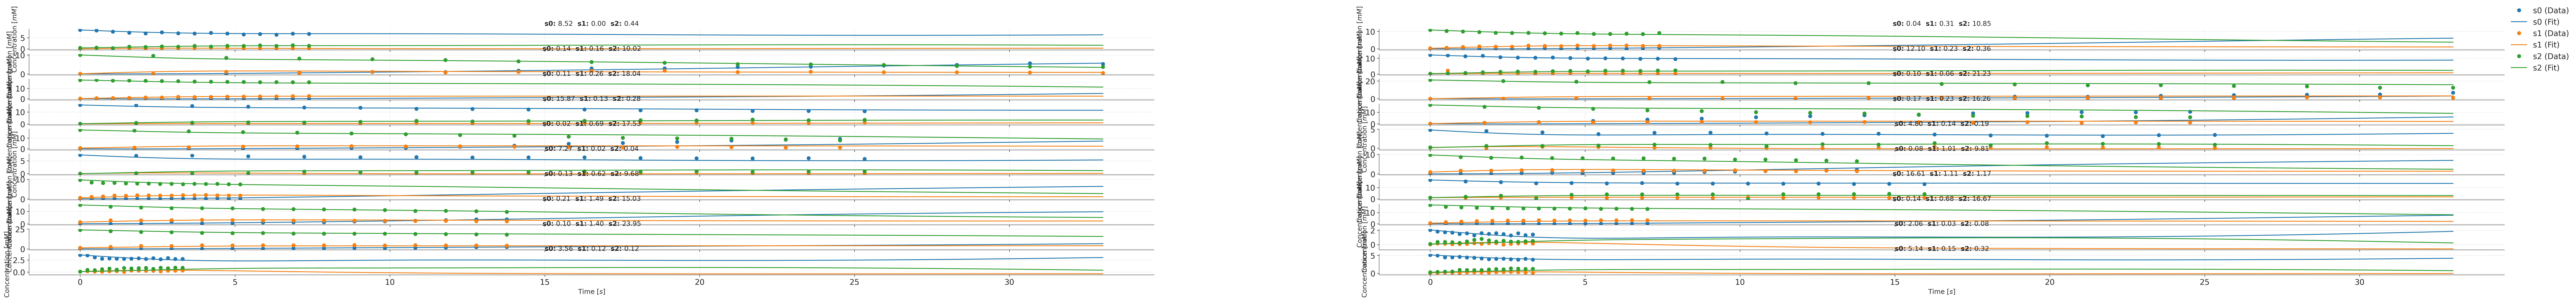

In [16]:
f = ctx.visualize(
    model=model,
    data=val_data,
    times=val_time,
    neural_ode=trained,
    initial_conditions=val_initial_conditions,
    figsize=(8,4),
)

In [20]:
f.savefig("C:/Users/danic/Thesis/Data/Training_Set_3_Val_visualization_bfgs.png", dpi=300, bbox_inches="tight")


C:\Users\danic\AppData\Local\Temp\ipykernel_28660\2400426424.py:1: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  f.savefig("C:/Users/danic/Thesis/Data/Training_Set_3_Val_visualization_bfgs.png", dpi=300, bbox_inches="tight")


In [21]:
# Save the file to a specific directory
with open("C:/Users/danic/Thesis/Data/Training_Set_3_Val_visualization_bfgs.pkl", "wb") as file:
    pickle.dump(f, file)


In [17]:
result, new_model = ctx.optimize(
    model=model,
    initial_conditions=val_initial_conditions,
    data=val_data,
    times=val_time,
    global_upper_bound=1e5,
    global_lower_bound=1e-6,
    method="lmfit"
)

C:\Users\danic\anaconda3\envs\test\Lib\site-packages\IPython\core\events.py:82: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  func(*args, **kwargs)
C:\Users\danic\anaconda3\envs\test\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


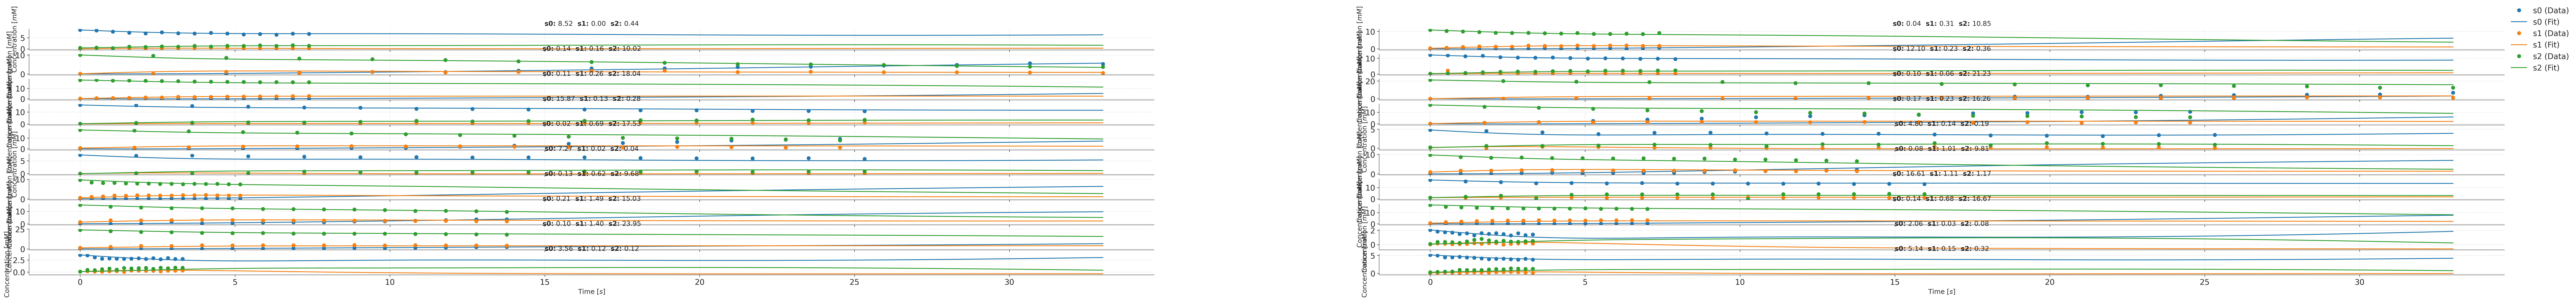

In [22]:
f = ctx.visualize(
    model=new_model,
    data=val_data,
    times=val_time,
    neural_ode=trained,
    initial_conditions=val_initial_conditions,
    figsize=(8,4),
)

In [23]:
f.savefig("C:/Users/danic/Thesis/Data/Training_Set_3_Val_visualization_lmfit.png", dpi=300, bbox_inches="tight")


C:\Users\danic\AppData\Local\Temp\ipykernel_28660\4193018379.py:1: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  f.savefig("C:/Users/danic/Thesis/Data/Training_Set_3_Val_visualization_lmfit.png", dpi=300, bbox_inches="tight")


In [24]:
# Save the file to a specific directory
with open("C:/Users/danic/Thesis/Data/Training_Set_3_Val_visualization_lmfit.pkl", "wb") as file:
    pickle.dump(f, file)


# NDE + HMC 

In [ ]:
# Initialize the model
model = ctx.Model(name="PGM ENO")

# Add species
model.add_species("s0")
model.add_species("s1")
model.add_species("s2")

# Add ODEs
model.add_ode("s0", "- (vf_pgm/k_p3ga_pgm)*(s0-s1/keq_pgm)/(1+(s1/k_p2ga_pgm)+(s0/k_p3ga_pgm))")
model.add_ode("s1", 
              """(vf_pgm/k_p3ga_pgm)*(s0-s1/keq_pgm)/(1+(s1/k_p2ga_pgm)+(s0/k_p3ga_pgm))
              - (vf_eno/k_p2ga_eno)*(s1-s2/keq_eno)/(1+(s1/k_p2ga_eno)+(s2/k_PEP_eno))
              """
             )
model.add_ode("s2", "(vf_eno/k_p2ga_eno)*(s1-s2/keq_eno)/(1+(s1/k_p2ga_eno)+(s2/k_PEP_eno))")


In [14]:
#Here we set the priors for the Monte Carlo to the parameter values generated by the NDE

model.parameters.vf_eno.value = 351.808062
model.parameters.vf_pgm.value = 0.62827157
model.parameters.keq_pgm.value = 540.626794
model.parameters.keq_eno.value = 	2.13808651
model.parameters.k_p2ga_pgm.value = 307.371861
model.parameters.k_p3ga_pgm.value = 45.8822982
model.parameters.k_p2ga_eno.value = 1473.16998
model.parameters.k_PEP_eno.value = 70.9140860

In [15]:
# Define Priors

model.parameters.vf_eno.prior = cmc.priors.Uniform(low=1e-3, high=1e1)
model.parameters.vf_pgm.prior= cmc.priors.Uniform(low=1e-3, high=1e1)
model.parameters.keq_pgm.prior= cmc.priors.Uniform(low=1e-3, high=1e1)
model.parameters.k_p2ga_pgm.prior = cmc.priors.Uniform(low=1e-3, high=1e1)
model.parameters.k_p3ga_pgm.prior = cmc.priors.Uniform(low=1e-3, high=1e1)
model.parameters.k_p2ga_eno.prior =cmc.priors.Uniform(low=1e-3, high=1e1)
model.parameters.k_PEP_eno.prior=cmc.priors.Uniform(low=1e-3, high=1e1)
model.parameters.keq_eno.prior=cmc.priors.Uniform(low=1e-3, high=1e1)


In [16]:
# Perform MCMC simulation
mcmc, bayes_model = cmc.run_mcmc(
    model=model,
    data=data,
    initial_conditions=initial_conditions,
    times=time,
    yerrs=2.0,
    num_warmup=2000,
    num_samples=1000,
    dt0=0.3,
    max_steps=64**4
)

🔸 Priors
├── k_p3ga_pgm: U(low=0.001, high=10.0)
├── vf_pgm: U(low=0.001, high=10.0)
├── keq_pgm: U(low=0.001, high=10.0)
├── k_p2ga_pgm: U(low=0.001, high=10.0)
├── vf_eno: U(low=0.001, high=10.0)
├── k_p2ga_eno: U(low=0.001, high=10.0)
├── k_PEP_eno: U(low=0.001, high=10.0)
├── keq_eno: U(low=0.001, high=10.0)

🚀 Running MCMC



sample: 100%|███████████████████████████| 3000/3000 [38:33<00:00,  1.30it/s, 63 steps of size 5.74e-02. acc. prob=0.94]




🎉 Finished

                  mean       std    median      5.0%     95.0%     n_eff     r_hat
   k_PEP_eno      0.39      0.27      0.33      0.01      0.74    795.20      1.00
  k_p2ga_eno      0.91      0.64      0.77      0.01      1.77    751.37      1.00
  k_p2ga_pgm      0.03      0.01      0.03      0.01      0.05    435.16      1.00
  k_p3ga_pgm      7.66      1.73      8.04      5.13      9.99    518.29      1.00
     keq_eno      3.25      0.14      3.24      3.02      3.47    855.32      1.00
     keq_pgm      0.11      0.01      0.11      0.11      0.13    837.94      1.00
       sigma      0.82      0.02      0.82      0.80      0.85    851.94      1.00
      vf_eno      8.23      1.35      8.54      6.31      9.99    348.05      1.01
      vf_pgm      6.44      2.04      6.37      3.67      9.99    328.01      1.00

Number of divergences: 1
